# Section 3

## Preliminaries

### Three-dimensional scatter plots
To generate three-dimensional scatter plots using `matplotlib` you need to import the `Axes3D` class from the `mpl_toolkits.mplot3d` module.

In [1]:
import numpy as np

import matplotlib
import matplotlib.pyplot as mplplot
from mpl_toolkits.mplot3d import Axes3D

%matplotlib inline

Then you need to specify a "`3d`" projection when instantiating your plotting axes using the `add_subplot()` method. After that simply supply three equal-length arrays to the `plot()` method of the axes, specifying the Cartesian $x$, $y$ and $z$ coordinates of each point. 

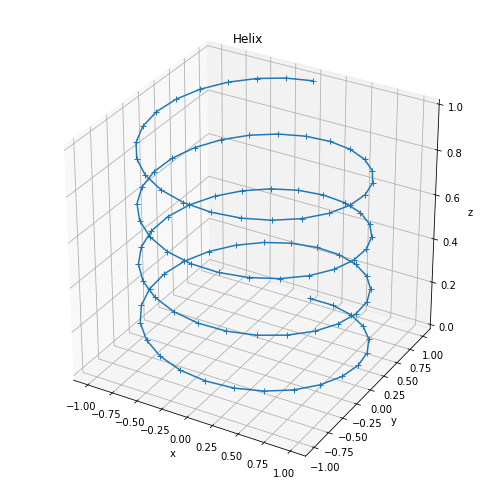

In [2]:
threeDimensionalAxes = mplplot.figure(figsize=(7,7)).add_subplot(1, 1, 1, projection ='3d')

# specify points that define a helical shape in three dimensions
zCoords = np.linspace(0, 1, 100)
yCoords = np.cos(8*np.pi*zCoords)
xCoords = np.sin(8*np.pi*zCoords)

# plot the points
threeDimensionalAxes.plot(xs=xCoords, ys=yCoords, zs=zCoords, marker='+')
threeDimensionalAxes.set_xlabel('x')
threeDimensionalAxes.set_ylabel('y')
threeDimensionalAxes.set_zlabel('z')
threeDimensionalAxes.set_title('Helix')

mplplot.tight_layout()

## Assignment - Populate a Universe with galaxies.

_For simplicity, assume an Euclidean Universe with $S=\frac{L}{r^{2}}$, where $S$ is the observed flux._

### Part 1: Set up a toy universe (i.e., populate it with "real" galaxies) in two ways
1. _Universe 1_: Create $10^{6}$ random galaxies uniformly distributed inside a spherical volume of $r=1$ and all with a single luminosity of $L=10$ units. Do this by generating appropriate random spherical polar coordinates ($r$, $\theta$, $\phi$) for each galaxy.
2. _Universe 2_: Create $10^{6}$ random galaxies uniformly distributed inside a sphere of $r=1$ and with luminosities distributed according a power law in luminosity with slope of $−3$ between $L_{\min}=1$ and $L_{\max}=30$ (i.e. $\frac{dn}{dL}=L^{−3}$).
3. For **both** universes, plot the distributions of $r$, $\theta$ and $\phi$ for your simulated galaxies. 
4. For **both** universes, check that your galaxies' are indeed uniformly distributed by plotting their coordinates in three-dimensional space. Explain in words, using [markdown](https://www.markdownguide.org) equations where necessary, the coputational steps required to derive the spatial coordinates of the galaxies in your simulated universes.

### Part 2: Now survey the sky: 

1. For both universes, calculate the number of galaxies on the sky as a function of the observed flux ($S$), and plot these galaxy counts in uniform log bins. For _Universe 1_, assume the telescope is sensitive to fluxes down to $\frac{0.1\cdot L}{r_{\max}^{2}}$. For _Universe 2_ assume a telescope with sensitivity limit of 30 flux units.
2. Are the results realistic? 
3. Make a plot of luminosity versus distance, and highlight the objects you can detect. What can you conclude? 
4. Look at how the distribution of luminosity changes as you apply your flux limit. Why do the number counts have the same slopes in both universes?

### Part 3 (AST5031 only):
Imagine that the Universe is permeated by a uniformly distributed, absorbing "aether", with a grey extinction curve that attenuates all wavelengths equally. Assume that the aether absorbs 90% of the radiation that is emitted by the most distant galaxy in each universe.
1. Show how your observed number counts change in each universe.
2. Is it possible to use only the observed number counts to distinguish the presence or absence of such an aether in either universe?

### Solution
#### Part 1
We'll need to generate some random numbers so let's start by importing and aliasing the `numpy.random` module.

In [3]:
import numpy.random as nprandom

##### Galaxy Positions
Let's start with the three-dimensional **positions** of our galaxies. We'll explore two methods that can be used to generate coordinates for uniformly distributed points **within** a sphere. 

The first is an extension into three dimensions of the method shown in the lectures for sampling point coordinates that are uniformly distributed on the **surface** of a sphere.

Begin by assuming that the abstract set of points $\{v\}$ is distributed with uniform density within a spherical volume with radius $R$. Let $f(v)$ be the probability **density** function (PDF) that defines the probability that a particluar point $v\in\{v\}$ is located within an abstract volume element $dV$, so
$$
\mathrm{Prob}(v~\mathrm{is~in}~dV) = f(v)dV.
$$
By definition the integral of **any** PDF over its entire domain is equal to unity i.e.
$$
\displaystyle\iiint\limits_{V}f(v)dV = f(v)\cdot\displaystyle\iiint\limits_{V}dV = 1
$$
where $V$ is spherical volume and the second step uses the fact that for a uniform density of points, $f(v)$ must be equal for any element $dV$ i.e. it is a constant with respect to $dV$. For our spherical volume (with $R=1$) we also know that 
$$
\displaystyle\iiint\limits_{V}dV = \frac{4\pi R^{3}}{3} = \frac{4\pi}{3}
$$
and therefore
$$
f(v) = \frac{3}{4\pi}
$$
Now define a second PDF $g(r,\theta,\phi)$ that describes the same distribution of points $\{v\}$ that $f(v)$ does, but this time in terms of a [spherical polar coordinate system](http://mathworld.wolfram.com/SphericalCoordinates.html). For clarity, we define $\phi\in[0, \pi)$ to be the polar angle and $\theta\in[0, 2\pi)$ to be the azimuthal angle. The figure illustrates this convention.

<img src="http://mathworld.wolfram.com/images/eps-gif/SphericalCoordinates_1201.gif"/>

In this coordinate system, the volume element $dV$ can be expressed as
$$
dV = r^{2}\sin\phi\,drd\theta d\phi
$$
and so formally, we can write
$$
\mathrm{Prob}(v~\mathrm{is~in}~dV) = f(v)dV = \frac{3}{4\pi}dV = \frac{3r^{2}\sin\phi}{4\pi}\,drd\theta d\phi = g(r,\theta,\phi)dr d\theta d\phi
$$
which implies
$$
g(r,\theta,\phi)=\frac{3r^{2}\sin\phi}{4\pi}.
$$
Now we can compute the marginal distributions for $r,\theta,\phi$ by integrating over appropriate pairs of "nuisance" parameters.
\begin{align}
g_{r}(r) &= \displaystyle\int\limits_{0}^{2\pi}
\displaystyle\int\limits_{0}^{\pi}
g(r,\theta,\phi)d\phi d\theta
= \frac{3r^{2}}{4\pi}\displaystyle\int\limits_{0}^{2\pi}
\displaystyle\int\limits_{0}^{\pi}
\sin\phi d\phi d\theta
= \frac{3r^{2}}{4\pi}\displaystyle\int\limits_{0}^{2\pi}\left[-\cos\phi\right]_{0}^{\pi}d\theta
= \frac{3r^{2}}{2\pi}\displaystyle\int\limits_{0}^{2\pi}d\theta
= \frac{3r^{2}}{2\pi}[\theta]_{0}^{2\pi}
= 3r^{2} \\
g_{\theta}(\theta) &= \displaystyle\int\limits_{0}^{1}
\displaystyle\int\limits_{0}^{\pi}
g(r,\theta,\phi)d\phi dr
= \frac{3}{4\pi}\displaystyle\int\limits_{0}^{1}
\displaystyle\int\limits_{0}^{\pi}
r^{2}\sin\phi d\phi dr
= \frac{3}{4\pi}\displaystyle\int\limits_{0}^{1}r^{2}\left[-\cos\phi\right]_{0}^{\pi}dr
= \frac{3}{2\pi}\displaystyle\int\limits_{0}^{1}r^{2}dr
= \frac{3}{2\pi}\left[\frac{r^{3}}{3}\right]_{0}^{1}
= \frac{1}{2\pi} \\
g_{\phi}(\phi) &= \displaystyle\int\limits_{0}^{1}
\displaystyle\int\limits_{0}^{2\pi}
g(r,\theta,\phi)d\theta dr\\
&= \frac{3}{4\pi}\displaystyle\int\limits_{0}^{1}
\displaystyle\int\limits_{0}^{2\pi}
r^{2}\sin\phi d\theta dr
= \frac{3\sin\phi}{4\pi}\displaystyle\int\limits_{0}^{1}r^{2}\left[\theta\right]_{0}^{2\pi}dr
= \frac{3\sin\phi}{2}\displaystyle\int\limits_{0}^{1}r^{2}dr
= \frac{3\sin\phi}{2}\left[\frac{r^{3}}{3}\right]_{0}^{1}
= \frac{\sin\phi}{2} 
\end{align}

Note that $g(\theta)$ and $g(\phi)$ are identical to the functions we derived for the angular distributions of uniform points on the **surface** of the sphere. To draw **samples** consistent with these marginal PDFs we can use the [inverse transformation method](https://en.wikipedia.org/wiki/Inverse_transform_sampling) that was presented in the lectures. 

First we need to derive the cumulative distribution functions $G(x): x\in(r, \theta, \phi)$ corresponding to $g(x): x\in(r, \theta, \phi)$. In one dimension, if the domain of $x\geq x_{\min}$, then the CDF is defined as
$$
G_{x}(x) = \displaystyle\int\limits_{x{\prime}_{\min}}^{x}g_{x}(x{\prime}) dx{\prime}
$$
so
\begin{align}
G_{r}(r) &= \displaystyle\int\limits_{0}^{r}g_{r}(r\prime) dr\prime = 
\displaystyle\int\limits_{0}^{r}3r\prime^{2} dr\prime = r^{3}\\
G_{\theta}(\theta) &= \displaystyle\int\limits_{0}^{\theta}g_{\theta}(\theta\prime) d\theta\prime = \displaystyle\int\limits_{0}^{\theta}\frac{1}{2\pi} d\theta\prime = 
\frac{1}{2\pi}\left[\theta\prime\right]_{0}^{\theta} = \frac{\theta}{2\pi}\\
G_{\phi}(\phi) &= \displaystyle\int\limits_{0}^{\phi}g_{\phi}(\phi\prime) d\phi\prime = \displaystyle\int\limits_{0}^{\phi}\frac{\sin\phi\prime}{2} d\phi\prime = 
\frac{1}{2}\left[-\cos\phi\prime\right]_{0}^{\phi} = -\frac{1}{2}\left[\cos\phi - 1\right]\\
\end{align}

Now we need to find the inverse CDFs $G^{-1}(x): x\in(r, \theta, \phi)$. This just involves some algebraic manipulation, eventually yielding.
\begin{align}
G_{r}^{-1}(r) &= r^{1/3}\\
G_{\theta}^{-1}(\theta) &= 2\pi\theta\\
G_{\phi}^{-1}(\phi) &=  \mathrm{arccos}\left(1-2\phi\right)
\end{align}

Finally, we saw in the lectures that if $\{j\}, \{u\}$ and $\{v\}$ are samples from $U(0,1)$, then letting 
\begin{align}
\{r\} &= G_{r}^{-1}(\{j\})\\
\{\theta\} &= G_{\theta}^{-1}(\{u\})\\
\{\phi\} &= G_{\phi}^{-1}(\{v\})\\
\end{align}

will produce samples $\{r\}, \{\theta\}, \{\phi\}$ that are distributed according to $g_{x}: x\in(r,\theta\phi)$.

Now that we have our formalism in place, let's define a `list` of lambda functions to compute $\{r\}, \{\theta\}, \{\phi\}$ given uniformly distibuted inputs sampled from $U(0, 1)$.

In [4]:
uniformToSphericalMappings = [
    lambda j: np.cbrt(j), # j -> r
    lambda u : 2.0*np.pi*u, # u -> theta
    lambda v : np.arccos(2.0*v - 1.0), # v -> phi
]

Let's use the [`numpy.random.rand` function](https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.random.rand.html) to generate a two dimensional array of real values sampled from $U(0,1)$. For _Universe 1_ we'll need 3 sets of $10^{6}$ random numbers, one set for each spatial coordinate. For _Universe 3_ we'll also require $10^{6}$ random values to generate the galaxies' luminosities. Let's preemptively generate all seven sets of random numbers.

In [5]:
randomValues = nprandom.rand(7, int(1e6))

# A key to add clarity
randomValuesKey = {'U1_R' : 0, 
                   'U1_THETA' : 1, 
                   'U1_PHI' : 2, 
                   'U2_R' : 3, 
                   'U2_THETA' : 4, 
                   'U2_PHI' : 5, 
                   'U2_LUM' : 6}

Let's check the distributions all look uniform, but not identical!

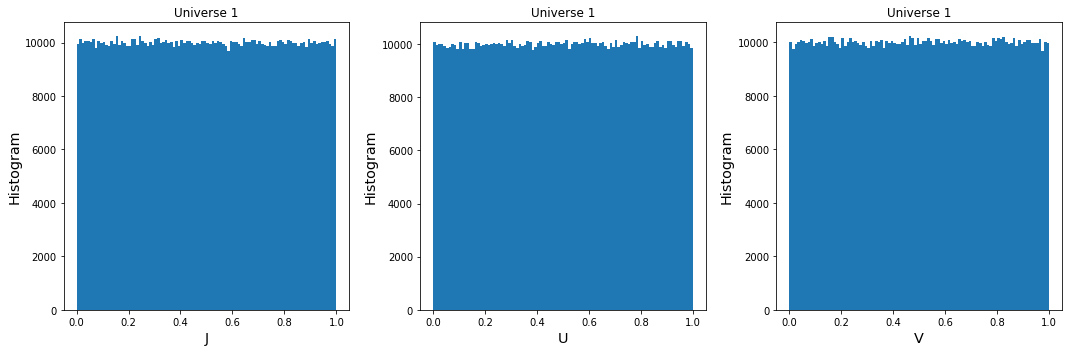

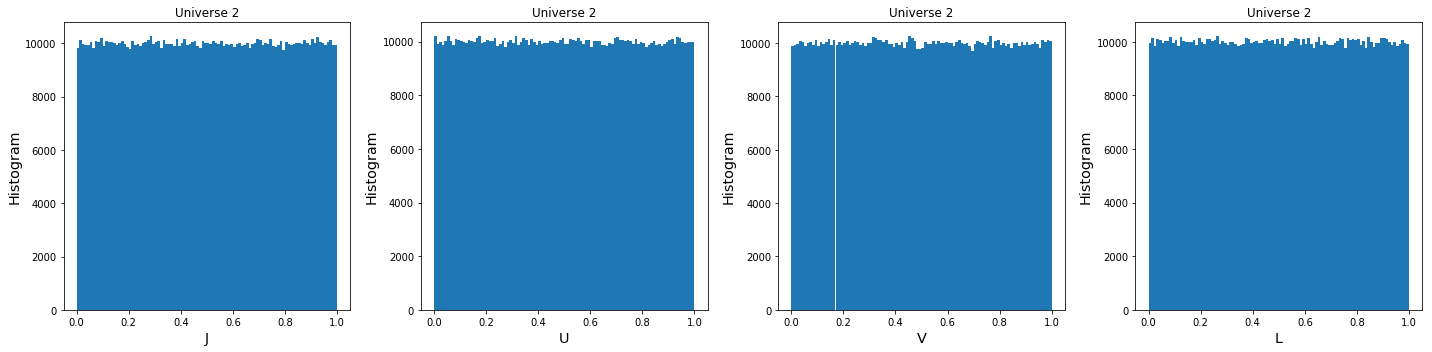

In [6]:
def plotDistHists(values, labels, title):
    histsFig = mplplot.figure(figsize=(5*min(len(values), values.shape[0]), 5))
    for counter, (label, vals) in enumerate(zip(labels,values)):
        histAxes = histsFig.add_subplot(1, min(len(values), values.shape[0]), counter +1)
        histAxes.hist(vals, bins=100)
        histAxes.set_xlabel(label, fontsize='x-large')
        histAxes.set_ylabel('Histogram', fontsize='x-large')
        histAxes.set_title(title)

    mplplot.tight_layout()

plotDistHists(values=randomValues[randomValuesKey['U1_R']:randomValuesKey['U1_PHI']+1], 
              labels='JUV', 
              title='Universe 1')
plotDistHists(values=randomValues[randomValuesKey['U2_R']:], 
              labels='JUVL', 
              title='Universe 2')

Looks good! Now let's apply our mapping functions to generate values for $\{r\}, \{\theta\}, \{\phi\}$ in each universe. We'll also make histograms to verify that our generated values look sensible.

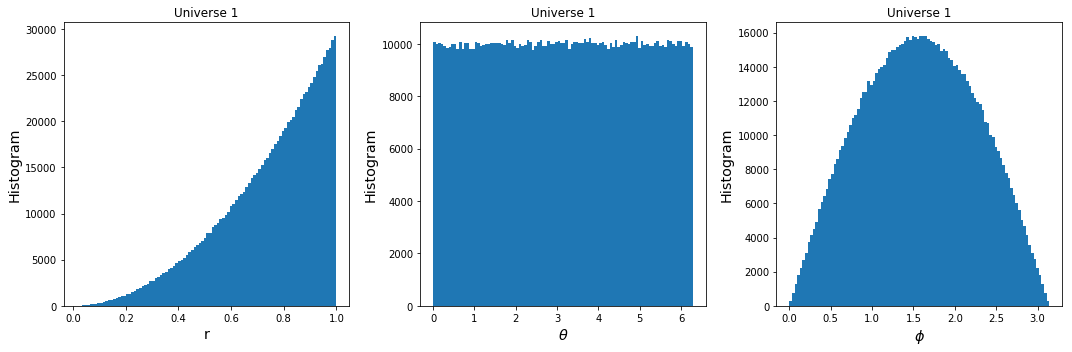

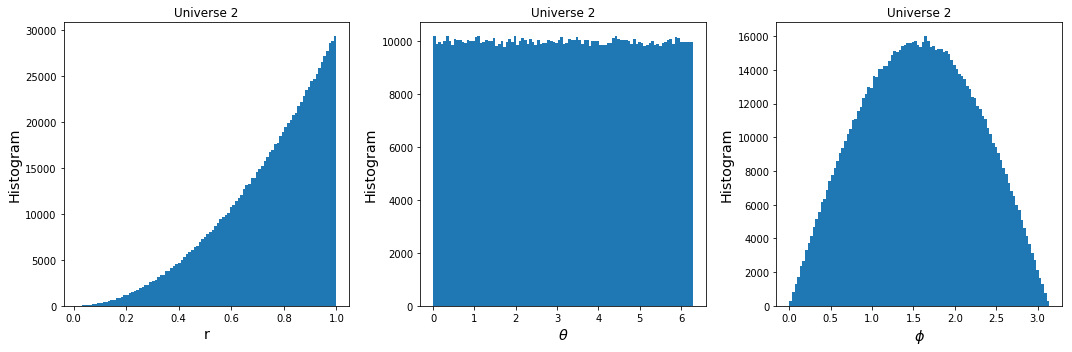

In [7]:
# Compute values for r, theta and phi
rThetaPhiVals = np.array([ mapping(values) for mapping, values in zip(np.tile(uniformToSphericalMappings, 2), randomValues) ])

# Plot distributions of the computed values
plotDistHists(values=rThetaPhiVals[randomValuesKey['U1_R']:randomValuesKey['U1_PHI']+1], 
              labels=['r', r'$\theta$', r'$\phi$'], 
              title='Universe 1')
plotDistHists(values=rThetaPhiVals[randomValuesKey['U2_R']:randomValuesKey['U2_PHI']+1], 
              labels=['r', r'$\theta$', r'$\phi$'], 
              title='Universe 2')

In order to plot our galaxies' locations in three dimensions using matplotlib we need to transform our values for $\{r\}, \{\theta\}, \{\phi\}$ into [corresponding **cartesian** coordinates](https://en.wikipedia.org/wiki/Spherical_coordinate_system#Cartesian_coordinates), yielding the sets $\{x\},\{y\},\{z\}$. The appropriate mappings are:
\begin{align}
x&=r.\cos\theta.\sin\phi\\
y&=r.\sin\theta.\sin\phi\\
z&=r.\cos\phi
\end{align}

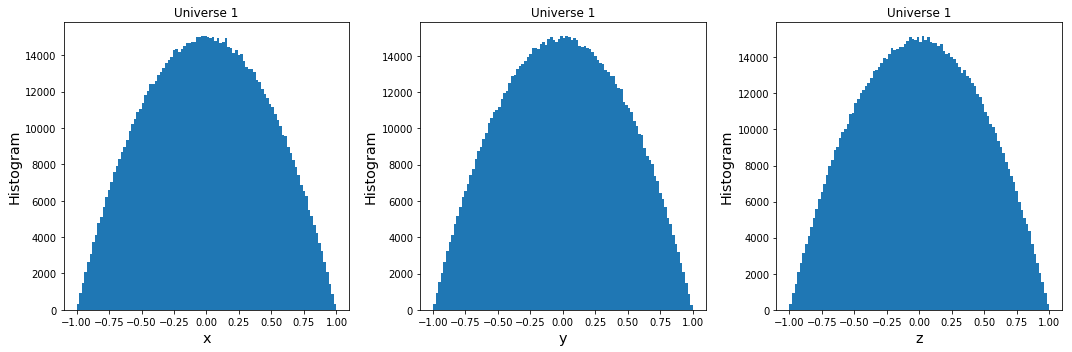

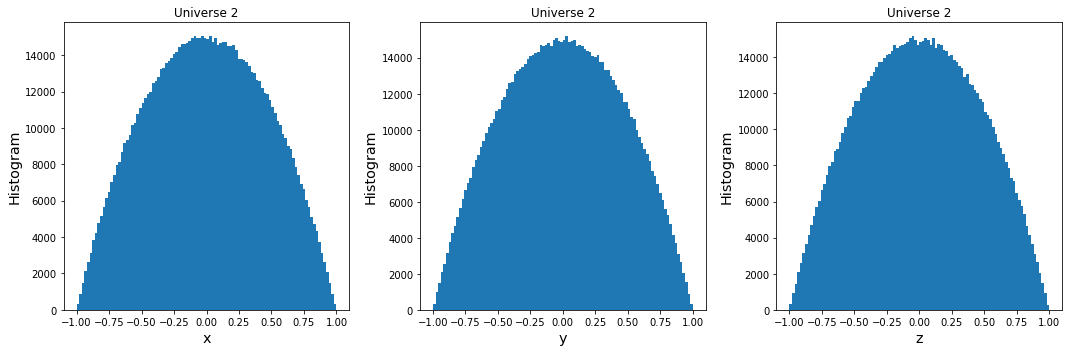

In [8]:
# Define mapping functions
cartesianMappings = [
    lambda r, theta, phi: r * np.cos(theta) * np.sin(phi), # x
    lambda r, theta, phi : r * np.sin(phi) * np.sin(theta), # y
    lambda r, theta, phi : r * np.cos(phi) # z
]

# Compute cartesian coordinates from r, theta, phi values
xyzVals = np.array([ 
    mapping(*rtps) for rtps in [rThetaPhiVals[randomValuesKey['U1_R']:randomValuesKey['U1_PHI']+1], 
                                rThetaPhiVals[randomValuesKey['U2_R']:randomValuesKey['U2_PHI']+1]]
    for mapping in cartesianMappings 
])

# Plot the distributions of x, y, z in each universe.
plotDistHists(values=xyzVals[randomValuesKey['U1_R']:randomValuesKey['U1_PHI']+1], 
              labels='xyz', 
              title='Universe 1')
plotDistHists(values=xyzVals[randomValuesKey['U2_R']:randomValuesKey['U2_PHI']+1], 
              labels='xyz', 
              title='Universe 2')

Finally, we're ready to plot our galaxies' position in three dimensions. To make rendering quicker we'll only plot a representative subsample comprising every hundredth galaxy we simulated.

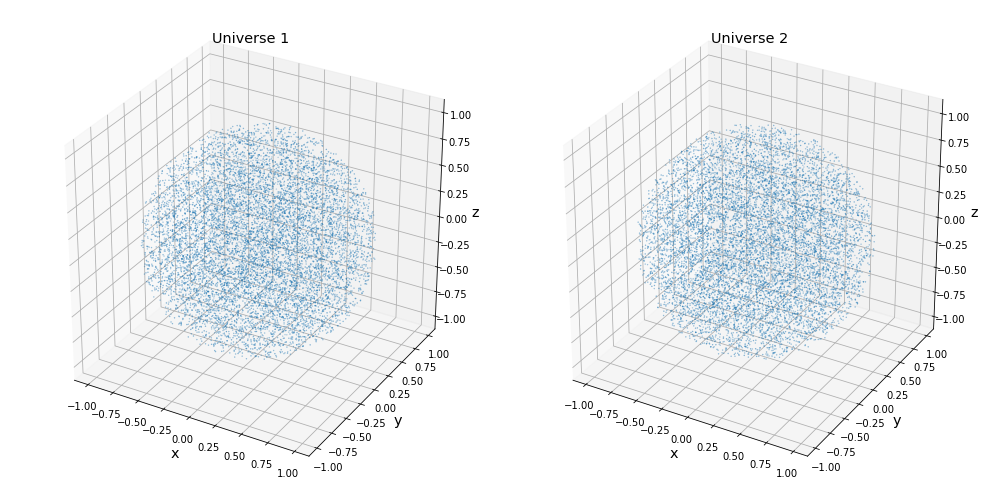

In [9]:
threeDimFigure = mplplot.figure(figsize = (14,7))
for counter, xyzSubset in enumerate([xyzVals[randomValuesKey['U1_R']:randomValuesKey['U1_PHI']+1], 
                                     xyzVals[randomValuesKey['U2_R']:randomValuesKey['U2_PHI']+1]]):
    threeDimAxes = threeDimFigure.add_subplot(1,2,counter+1, projection='3d')
    threeDimAxes.scatter(*xyzSubset[:, ::100], marker='.', s=0.5)
    threeDimAxes.set_xlabel('x', fontsize='x-large')
    threeDimAxes.set_ylabel('y', fontsize='x-large')
    threeDimAxes.set_zlabel('z', fontsize='x-large')
    threeDimAxes.set_title('Universe {}'.format(counter+1), fontsize='x-large')
mplplot.tight_layout()

Excellent, those both look like sets of points uniformly distributed inside a unit sphere. As promised, we'll quickly examine another method that we could have used for this problem. It's worth noting that the method we just used works well in three dimensions but extends very poorly to higher dimensional hyperspheres. Fundamentally that's because the higher dimensional analogues of the functions we derived include many more trigonometric terms which are relatively slow to compute. The alternative method we are about to demonstrate is not affected in this way. For interested students [this paper](https://pdfs.semanticscholar.org/467c/634bc770002ad3d85ccfe05c31e981508669.pdf) compares the efficiency of three alternative algorithms, including the two we discuss here.

The basic algorithm for our alternative method in $N$ dimensions entails drawing $N$ equally sized sets of independent random variates from the standard normal distribution. The corresponding entries of the different sets represent the coordinates of each point on the surface of an $N$-dimensional hypersphere. To generate points which lie on the surface of the **unit** hypersphere simply divide the coordinates of each point by the length of the vector connecting that point to the origin. In three dimensions, simply generate

\begin{align}
\{x\}&\sim N(0,1)\\
\{y\}&\sim N(0,1)\\
\{z\}&\sim N(0,1)
\end{align}

Then for each corresponding $x,y,z$ triplet normalize using
\begin{align}
A &= \sqrt{x^{2}+y^{2}+z^{2}}\\
x&\rightarrow x/A\\
y&\rightarrow y/A\\
z&\rightarrow z/A\\
\end{align}

Let's make a plot to see this method in action. We'll use numpy's `random.normal` function to generate our normally distributed random variates.

But how do we generate random points with uniform **volume** density inside a unit sphere? In that case we need to divide our normalization factors by random numbers with an appropriate PDF. Fortunately we already know the PDF we need because we derived it previously. It is identical to the pdf for $r$ using the primary method we discussed. Formally, we just need define a set of independent normalization factors for each galaxy position vector. 
$$
\{A\} = \frac{A}{u^{1/3}} :u\sim U(0,1)
$$

Let's make two plots to illustrate this alternative approach in action.

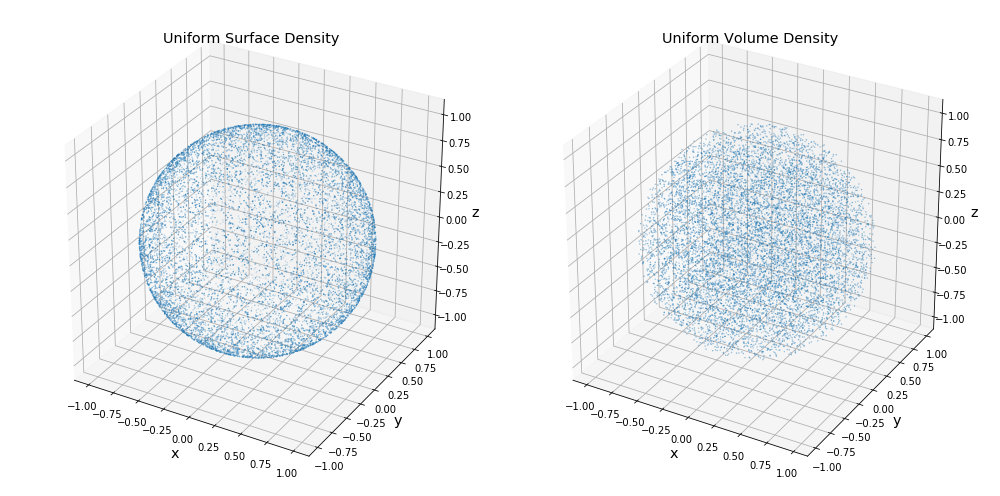

In [10]:
standardNormalVariates = nprandom.normal(size=(3, int(1e6)))
normalization = np.sqrt(np.sum(standardNormalVariates**2, axis=0))

threeDimFigure = mplplot.figure(figsize = (14,7))
surfaceDensityAxes = threeDimFigure.add_subplot(1,2,1, projection='3d')
surfaceDensityAxes.scatter(*standardNormalVariates[:,::100]/normalization[::100], marker='.', s=0.5)
surfaceDensityAxes.set_xlabel('x', fontsize='x-large')
surfaceDensityAxes.set_ylabel('y', fontsize='x-large')
surfaceDensityAxes.set_zlabel('z', fontsize='x-large')
surfaceDensityAxes.set_title('Uniform Surface Density', fontsize='x-large')

newNormalization = normalization / np.cbrt(nprandom.random(size=normalization.shape[0]))

volumeDensityAxes = threeDimFigure.add_subplot(1,2,2, projection='3d')
volumeDensityAxes.scatter(*standardNormalVariates[:,::100]/newNormalization[::100], marker='.', s=0.5)
volumeDensityAxes.set_xlabel('x', fontsize='x-large')
volumeDensityAxes.set_ylabel('y', fontsize='x-large')
volumeDensityAxes.set_zlabel('z', fontsize='x-large')
volumeDensityAxes.set_title('Uniform Volume Density', fontsize='x-large')

mplplot.tight_layout()

##### Galaxy Luminosities
Now that we've allocated spatial coordinates to the galaxies in our two universes, we can proceed to assign luminosities to them. For _Universe 1_ all galaxies have the same luminosity, so this is a trivial step. To save computer memory we use the `numpy.broadcast_to` function.

In [11]:
u1GalaxyLuminosity = 10
u1Luminosities = np.broadcast_to(u1GalaxyLuminosity, (int(1e6),))

For _Universe 2_ we are told to assume that our galaxies' luminosities are
> distributed according a power law in luminosity with slope of $−3$ between $L_{\min}=1$ and $L_{\max}=30$.

To generate a power law distribution of luinosities we can use the [inverse transformation method](https://en.wikipedia.org/wiki/Inverse_transform_sampling). We are told that 
$$
\frac{dn}{dL} \propto L^{\Gamma} : \Gamma=-3,\;L_{\min}=1,\;L_{\max}=30
$$
Deriving a PDF for our galaxies' simply entails normalizing $\frac{dn}{dL}$ to have unit integral between $L_{\min}$ and $L_{\max}$. So the required PDF is 
$$
f(L) = \frac{L^{\Gamma}}{\displaystyle\int\limits_{L_{\min}}^{L_{\max}}L^{\Gamma}dL} = \frac{L^{\Gamma}(\Gamma+1)}{L_{\max}^{\Gamma+1} - L_{\min}^{\Gamma+1}}
$$
The associated CDF is:
$$
F_{L}(L) = \displaystyle\int\limits_{L\prime_{\min}}^{L}f_{L}(L{\prime}) dL{\prime} 
= \frac{\Gamma+1}{L_{\max}^{\Gamma+1} - L_{\min}^{\Gamma+1}}\displaystyle\int\limits_{L_{\min}}^{L}L\prime^{\Gamma}dL{\prime} 
= \frac{\Gamma+1}{L_{\max}^{\Gamma+1} - L_{\min}^{\Gamma+1}}\frac{1}{\Gamma+1}\left[L\prime^{\Gamma+1}\right]_{L_{\min}}^{L} 
= \frac{1}{L_{\max}^{\Gamma+1} - L_{\min}^{\Gamma+1}}\left[L^{\Gamma+1} - L_{\min}^{\Gamma+1}\right]
$$
and the inverse CDF is therefore:
$$
F_{L}^{-1}(u) = \left[(L_{\max}^{\Gamma+1} - L_{\min}^{\Gamma+1})u + L_{\min}^{\Gamma+1}\right]^{\frac{1}{\Gamma+1}}
$$
As usual, if the set $\{u\}\sim U(0,1)$, then the transformed $F_{L}^{-1}(\{u\})$ has the required power law distribution.

Let's write a function to compute the transformation.

In [12]:
def uniformToPowerLaw(uniformVariates, plIndex, minX, maxX):
    exponent = plIndex + 1
    return ((maxX**exponent - minX**exponent)*uniformVariates + minX**exponent)**(1.0/float(exponent))

Now we can use our function to generate the required luminosity values for _Universe 2_. Recall that we already generated the uniform random numbers that we need.

In [13]:
u2Luminosities = uniformToPowerLaw(randomValues[randomValuesKey['U2_LUM']], -3, 1, 30)

Let's make a histogram of values to check that we really did generate a power law distribution with the correct slope. Note that a histogram plots $n(L)$, but our power law index applied to the **density** $\frac{dn}{dL}$. The former is simply the integral of the latter.
$$
n(L) = \displaystyle\int\frac{dn}{dL} dL \propto L^{-2}
$$

Power law functions and distributions are much better visualized using logarithmic binning and axis scales. We use the [`numpy.logspace` function](https://docs.scipy.org/doc/numpy/reference/generated/numpy.logspace.html) to generate logarithmic bins for our histogram and the [`set_xscale`](https://matplotlib.org/2.0.2/api/_as_gen/matplotlib.axes.Axes.set_xscale.html) and [`set_yscale`](https://matplotlib.org/2.0.2/api/_as_gen/matplotlib.axes.Axes.set_yscale.html) methods of `matplotlib.axes.Axes`  to set the axes' scales. 

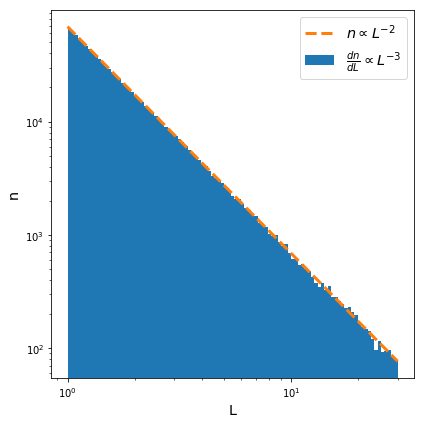

In [14]:
lumAxes = mplplot.figure(figsize=(6,6)).add_subplot(1,1,1)

## Set axis scales to be logarithmic
lumAxes.set_yscale('log')
lumAxes.set_xscale('log')

## Plot the histogram of simulated luminosities
contents, bins, _ = lumAxes.hist(u2Luminosities, bins=np.logspace(0, np.log10(30), 100), 
                                 label=r'$\frac{dn}{dL}\propto L^{-3}$')

## Plot n ~ L^{-2}
## Compute approximate normalization for analytical line based on detected sources
analyticNorm = contents[0]*(0.5*(bins[0]+bins[1]))**2.0

lumAxes.plot(np.logspace(0, np.log10(30), 100), 
             analyticNorm*np.logspace(0, np.log10(30), 100)**-2, 
             lw=3, ls='--', label='$n\propto L^{-2}$')

lumAxes.set_xlabel('L', fontsize='x-large')
lumAxes.set_ylabel('n', fontsize='x-large')
lumAxes.legend(fontsize='x-large')
mplplot.tight_layout()

The question tells us that we can
> assume an Euclidean Universe with $S=\frac{L}{r^{2}}$, where $S$ is the observed flux.

This implies that the astronomers who observe our spherical universes are located at their centres, where $r=0$. This means that we can write a very simple function to convert our simulated luminosities into flux values.

In [15]:
def euclideanLuminosityToFlux(luminosities, distances):
    return luminosities/distances**2

#### Part 2:
Now we can write a function that simulate the detection capabilities of the telescopes in each universe and return arrays containing a Boolean value for each galaxy that is `True` if the galaxy is detected and `False` otherwise. These arrays can be used to select detected galaxies and plot their number counts as a function of $S$.

Recall that in _Universe 1_, the telescope can detect all galaxies satisfying
$$
S_{\mathrm{threshold}} > 0.1\cdot \frac{L_{\mathrm{U1}}}{r_{\max}^{2}}: L_{\mathrm{U1}} = 10
$$
whereas in _Universe 2_, the telescope is sensitive to all galaxies with fluxes $S > 30$.

In [16]:
def u1TelDetectionFunction(fluxes, **kwargs):
    # If no distances array is supplied, assume a maximum distance r_{max} == 1
    maxDistance = np.amax(kwargs.get('maxDistances', 1.0))
    # Since L_{U1} = 10, then 0.1*L_{U1} = 1
    return fluxes > 1.0/maxDistance

def u2TelDetectionFunction(fluxes, **kwargs):
    return fluxes >= 30.0

Now we can define a generic function to plot the number counts of detected galaxies in either universe.

Recall that we are instructed to
> plot these galaxy counts in uniform log bins.

We can use the `numpy.logspace` function to define these bins.

In [31]:
def computeAnalyticNorm(contents, bins, **kwargs):
    ## Compute approximate normalization for analytical line based on histogram 
    ## for detectded galaxies.
    powerLawIndex = kwargs.get('powerLawIndex', -1.5)
    normSelection = contents > 0
    binCentres = 0.5*(bins[1:] + bins[:-1])
    ## The first bin containing detected galaxies may not be complete, so
    ## base normalization on the sectond bin
    analyticNorm = contents[normSelection][1]*binCentres[normSelection][1]**-powerLawIndex
    return analyticNorm

def plotNumberCountsVersusFlux(flux, detectionStatuses, fluxAxes = None, addTheoretical = True, labelPrefix=''):
    fluxAxes = mplplot.figure(figsize=(7,7)).add_subplot(1,1,1) if fluxAxes is None else fluxAxes
    fluxAxes.set_yscale('log')
    fluxAxes.set_xscale('log')
    
    logarithmicBinEdges = np.logspace(np.log10(np.amin(flux)), np.log10(np.amax(flux)), 100)
    
    if False in detectionStatuses:
        fluxAxes.hist(flux, 
                      bins=logarithmicBinEdges, 
                      label=r'{} $N(S)$ Not detected'.format(labelPrefix))
    
    if True in detectionStatuses:
        contents, bins, _ = fluxAxes.hist(flux[detectionStatuses], 
                                          bins=logarithmicBinEdges, 
                                          label=r'{} $N(S)$ Detected'.format(labelPrefix))
    

    ## Add a line with the theoretically expected power law slope
    if addTheoretical:
        fluxAxes.plot(logarithmicBinEdges, 
                      computeAnalyticNorm(contents, bins)*logarithmicBinEdges**-1.5, 
                      lw=3, 
                      ls='--', 
                      label=r'$N(S)\propto S^{-\frac{3}{2}}$', 
                      c='k')
    
    fluxAxes.set_xlabel('S', fontsize='x-large')
    fluxAxes.set_ylabel('N(S)', fontsize='x-large')
    fluxAxes.legend(fontsize='x-large')
    mplplot.tight_layout()
    
    ## Return the plotting axes in case we want to overplot
    return fluxAxes

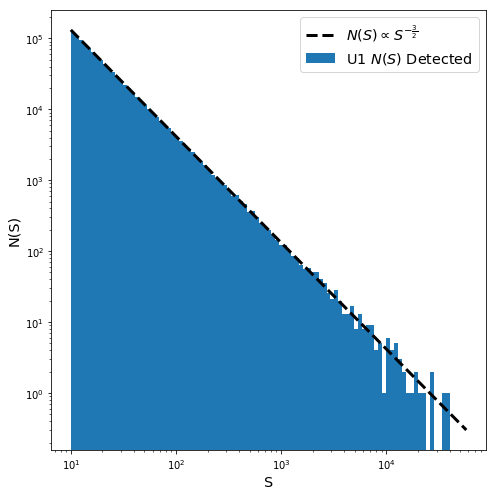

In [32]:
u1Distances = rThetaPhiVals[randomValuesKey['U1_R']]
u1Fluxes = euclideanLuminosityToFlux(u1Luminosities, u1Distances)
_ = plotNumberCountsVersusFlux(u1Fluxes, u1TelDetectionFunction(u1Fluxes, distances=u1Distances), labelPrefix='U1')

Note that in _Universe 1_, **all galaxies are detected**. It is obvious why this should be the case. All galaxies have $L_{\mathrm{U1}} = 10$ and the maximum possible distance for any galaxy $r_{\max} = 1$. This means that the minimum possible flux

$$
S_{\min} = \frac{10}{r_{\max}^2} = 10\cdot S_{\mathrm{threshold}}
$$

Even the faintest galaxy is 10 times brighter than the telescope detection threshold! The number of galaxies that are detected with observed flux $S$ follows a power-law distribution

$$
N(S)\propto S^{-\frac{3}{2}}
$$

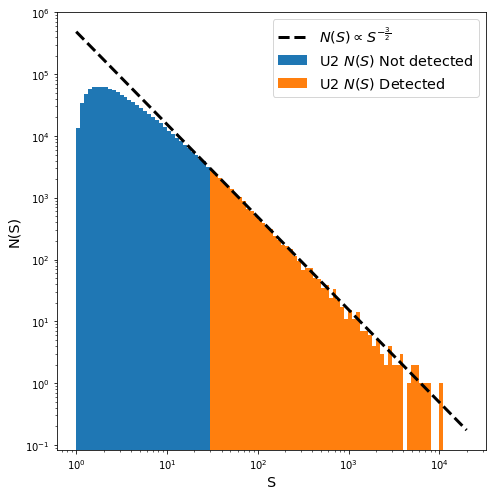

In [19]:
u2Distances = rThetaPhiVals[randomValuesKey['U2_R']]
u2Fluxes = euclideanLuminosityToFlux(u2Luminosities, u2Distances)
_ = plotNumberCountsVersusFlux(u2Fluxes, u2TelDetectionFunction(u2Fluxes), labelPrefix='U2')

In _Universe 2_, the galaxy luminosity function extends down to $L_{\mathrm{U2},\min} = 1$ and so $S_{\mathrm{U2},\min} = 1$. Since the telescope in _Universe 2_ can only detect galaxies with $S_{\mathrm{U2}} > 30$, then some galaxies will not be detected. 

For the **detected** galaxies $N(S)\propto S^{-{3}/{2}}$ which exhibits an identical slope to _Universe 1_. 

The question asks:
> Are the results realistic?

To understand why the observed slopes in both universes are the same, let's begin by considering the subset of these galaxies surrounding the observer in a thin spherical shell with inner radius $R$ and outer radius $R+dR$. The volume of such a shell is

$$
dV(R) = 4\pi R^{2}\;dR
$$

We assume that $\rho(L>L_{\star})$ is the number density of galaxies with $L$ exceeding some threshold luminosity $L_{\star}$ and is constant throughout each universe, so the number of galaxies with luminosity $L > L_{\star}$ in our shell with radius $R$ is

$$
dN(L > L_{\star}, R) = \rho(L) dV(R) = 4\pi\cdot \rho(L)\cdot R^{2}\;dR
$$

The observed flux $S$ of a galaxy is related to its luminosity and its distance from the observer by

$$
S = \frac{L}{4\pi R^{2}} \implies L = 4\pi R^{2}\cdot S
$$

So the number of galaxies with observed flux $S > S_{\star}$ within our shell is simply

$$
dN(S > S_{\star}, R) = 4\pi\cdot \rho(4\pi R^{2}\cdot S)\cdot R^{2}\;dR
$$

To obtain the total number of galaxies observed with $S > S_{\star}$, we integrate over all possible shell radii

$$
N(S > S_{\star}) = \int\limits_{0}^{\infty}4\pi\cdot \rho(L>4\pi R^{2}\cdot S)\cdot R^{2}\;dR
$$

Noting that

$$
L = 4\pi R^{2}\cdot S \implies R = \left(\frac{L}{4\pi\cdot S}\right)^{1/2} \implies \frac{dL}{dR} = \frac{1}{2}\left(\frac{1}{4\pi\cdot L\cdot S}\right)^{-1/2}
$$

we can perform a change of variables and re-express $N(S > S_{\star})$ as an integral over luminosity.

$$
N(S > S_{\star}) = \int\limits_{0}^{\infty}\rho(L>L_{\star})\cdot \left(\frac{L}{4\pi\cdot S}\right)\cdot\frac{1}{2}\left(\frac{1}{4\pi\cdot L\cdot S}\right)^{1/2}dL = \frac{1}{16\pi^{3/2}}S^{-3/2} \int\limits_{0}^{\infty}\rho(L>L_{\star})\cdot L^{1/2}\; dL
$$

This expression shows that $N(S > S_{\star})\propto S^{-3/2}$ regardless of the form of $\rho(L>L_{\star})$. The integral is independent of $S$. Note that this is definitely **not** the case for the real Universe in which relativistic cosmology must be accounted for when computing the comoving distance to an observed galaxy and the comoving volumes of spherical shells.

Finally, our histograms do not plot $N(S > S_{\star})$, but rather $N(S)$ in **logarithmic bins** $d(\log_{10} S)$. To show why our histograms exhibit $N(S)\propto S^{-3/2}$, we can derive the count $dN$ in a bin with with $d(\log_{10} S)$.

\begin{align}
N(S > S_{\star}) &= \mathrm{constant}\cdot S^{-3/2}\\
\implies dN &= -\frac{3}{2}\cdot \mathrm{constant}\cdot S^{-5/2} dS \\
&= -\frac{3}{2}\cdot \mathrm{constant}\cdot S^{-1}\cdot S^{-3/2} dS \\
&= -\frac{3}{2}\cdot \mathrm{constant}\cdot \ln(10)\cdot S^{-3/2} d(\log_{10} S)
\end{align}
The last step uses the fact that
$$
\frac{d}{dx}\left[\log_{a}x\right] = \frac{1}{x\ln(a)} \implies \frac{dS}{d(\log_{10} S)}\cdot d(\log S) = S\cdot \ln(10)\cdot d(\log S)
$$

Now we can plots of the luminosites and distances for detected and non-detected galaxies in each universe. We'll write a function to generate the plot we need.

Anticipating the task specified in **Part 3**, we'll also allow our function to apply an attenuation function but let this default to the case of no attenuation. Since attenuation might affect the detectability of galaxies, we'll pass the detection **function** for each universe as an argument to our function. The ability to pass functions as arguments to functions can be very handy!

In [20]:
def plotLumVersusDistance(luminosities, distances, detectionFunction, 
                          attenuationFunction = lambda flux, distance : flux):
    lumDistAxes = mplplot.figure(figsize=(7,7)).add_subplot(1,1,1)
    ## Compute fluxes assuming a Euclidean Universe
    fluxes = luminosities/(distances**2)
    ## Attenuate the fluxes before determining whether the galaxies were detected
    fluxes = attenuationFunction(fluxes, distances)
    ## Compute the detection statuses of our simulated galaxies
    detected = detectionFunction(fluxes, distances=distances)
    ## Plot luminosity versus distance for the non-detections 
    if False in detected:
        lumDistAxes.scatter(distances[~detected], luminosities[~detected], 
                            marker = '.', label='Not detected', rasterized=True)  
    ## Plot luminosity versus distance for the detections
    if True in detected:
        lumDistAxes.scatter(distances[detected], luminosities[detected], 
                            marker = '.', label='Detected', rasterized=True)
    ## Make the plot look "pretty"!
    lumDistAxes.set_xlabel('Distance (Arbitrary Units)', fontsize='x-large')
    lumDistAxes.set_ylabel('Luminosity (Arbitrary Units)', fontsize='x-large')
    lumDistAxes.legend(fontsize='x-large', scatterpoints=3)
    mplplot.tight_layout()
    ## Return the plotting axes in case we want to overplot any lines etc.
    return lumDistAxes

The plot for _Universe 1_ with no attenuation is going to look pretty boring, because all galaxies have the same luminosity and all galaxies are detected!

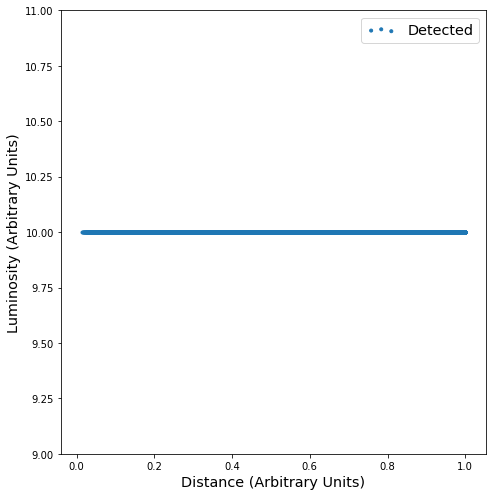

In [21]:
lumVersusDistanceAxes = plotLumVersusDistance(u1Luminosities, u1Distances, u1TelDetectionFunction)
lumVersusDistanceAxes.set_ylim(9,11)
mplplot.tight_layout()

For _Universe 2_ though, things look a little more interesting. Now, our galaxies have a range of luminosities (with the power law distribution that we specified), and some are not detected. Specifically galaxies are only detected when
$$
L > 30\cdot r^{2}
$$
Let's overplot this selection criterion as a line on our galaxy luminosity versus distance scatter plot.

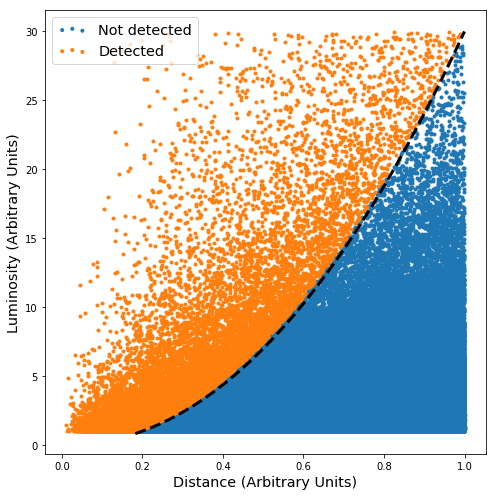

In [22]:
lumDistAxes = plotLumVersusDistance(u2Luminosities, u2Distances, u2TelDetectionFunction)
## Compute the minimum distance for which a galaxy might not be detected.
## Such a galaxy would have the minimum possible luminosity i.e. L=1 
minNonDetectionDistance = np.sqrt(1.0/30.0)
distanceValues = np.linspace(minNonDetectionDistance, 1.0, 30)
lumDistAxes.plot(distanceValues, 30.0*distanceValues**2.1, c='k', lw=3, ls='--')
mplplot.tight_layout()

#### Part 3:
The question does not specify a functional dependence for the aether's attenuation on the distance to the source. In principle, any attenuation function is possible, but for this model solution we'll assume an exponential function
$$
S_{\mathrm{observed}} = S_{\mathrm{emitted}}e^{-\tau\cdot r}
$$
Once we know the value of $\tau$ we can compute the observed flux of a galaxy at any distance. We're told that
> the aether absorbs 90% of the radiation that is emitted by the most distant galaxy in each universe.

Therefore:
$$
\frac{S_{\mathrm{observed}}}{S_{\mathrm{emitted}}} = 0.1 = e^{-\tau\cdot r_{\max}} \implies \tau=-\frac{1}{r_{\max}}\ln\left(0.1\right)
$$

We'll define a function that computes the attenuated flux.

In [23]:
def attenuateFlux(flux, distance, maxDistResidualFrac = 0.1):
    tau = -np.log(maxDistResidualFrac)/np.amax(distance)
    flux = flux*np.exp(-tau * distance)
    return flux

We saw in **Part 2** that with no aether, the observed galaxy number counts obey a power law distribution in $S$ with slope $-3/2$. Let's plot the observed number counts in the presence of our aether and compare their slopes with those we saw in **Part 2**.

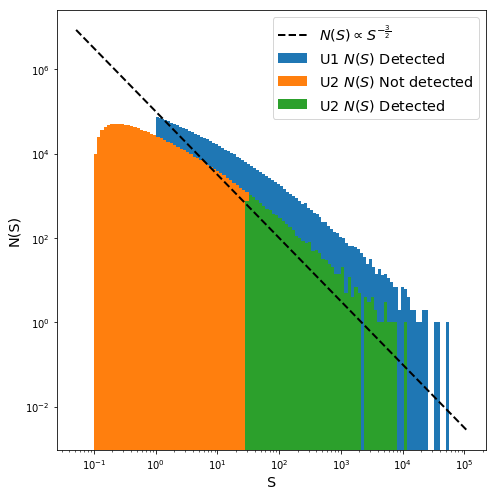

In [24]:
## Universe 1
u1AttenuatedFlux = attenuateFlux(u1Fluxes, u1Distances)
numberCountAxes = plotNumberCountsVersusFlux(u1AttenuatedFlux, 
                                             u1TelDetectionFunction(u1AttenuatedFlux, distances=u1Distances), 
                                             addTheoretical=False, 
                                             labelPrefix='U1')
## Universe 2
u2AttenuatedFlux = attenuateFlux(u2Fluxes, u2Distances)
numberCountAxes = plotNumberCountsVersusFlux(u2AttenuatedFlux, 
                                             u2TelDetectionFunction(u2AttenuatedFlux, distances=u2Distances), 
                                             addTheoretical=False, 
                                             fluxAxes=numberCountAxes, 
                                             labelPrefix='U2')

## Plot the S^{-3/2} power law that is observed in the absence of an aether
fluxAxisValues = np.linspace(*numberCountAxes.get_xlim(), 100)
numberCountAxes.plot(fluxAxisValues, 1e5*fluxAxisValues**-1.5, c='k', ls='--', lw=2, 
                     label=r'$N(S)\propto S^{-\frac{3}{2}}$')

## Make the plot look pretty!
numberCountAxes.legend(fontsize='x-large')
mplplot.tight_layout()

The question asks
> Is it possible to use only the observed number counts to distinguish the presence or absence of such an aether in either universe?

In _Universe 1_ the presence of the aether can be identified in two ways. Firstly, the observed number counts deviate from a pure power law function of $S$ at low fluxes. Secondly, the slope at high fluxes deviates from the $-3/2$ slope that arises invariably when no aether is present.

In _Universe 2_ the curvature at low fluxes is not detectable because the associated galaxies are too faint, however the slope at large $S$ still differs from $-3/2$.

The aether is detectable in both universes.